# Загрузка Pandas и очистка данных

In [1]:
import pandas as pd
import datetime
import collections
import numpy as np

In [303]:
df = pd.read_csv('data/main_task.csv')

In [201]:
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки
# df.drop(['City', ])

In [2]:
df = pd.read_csv('data/main_task.csv')

def convert_price(price_range):
    if price_range == '$':
        return 1
    elif price_range == '$$ - $$$':
        return 2
    elif price_range == '$$$$':
        return 3
    else:
        return 2
    
def count_Cuisine(cuisine_style):
    count = 1
    if str(cuisine_style) != 'nan':
#         print(cuisine_style)
#         print(cuisine_style[2:-2].split("\', \'"))
        count = len(cuisine_style[2:-2].split("\', \'"))
#         style_mean += len(st)
#         count += 1
#         all_style += st
#     else:
#         print(cuisine_style)
#         style_mean += 1
#         count += 1
    return count
    
    
df['empty_price'] = df['Price Range'].apply(lambda x: 1 if str(x) == 'nan' else 0)    
df['Price Range'] = df['Price Range'].apply(convert_price)
df['count_cuisine_style'] = df['Cuisine Style'].apply(count_Cuisine)
display(df['Price Range'].value_counts())
# df['empty_price'] = df['Price Range'].apply(lambda x: 1 if x.isna() else 0)
display(df['count_cuisine_style'].value_counts())
type(df)



2    32298
1     6279
3     1423
Name: Price Range, dtype: int64

1     16547
2      6294
3      5306
4      4799
5      3606
6      2043
7      1022
8       283
9        76
10       19
11        3
21        1
13        1
Name: count_cuisine_style, dtype: int64

pandas.core.frame.DataFrame

In [3]:
display(df['City'].value_counts())

London        5757
Paris         4897
Madrid        3108
Barcelona     2734
Berlin        2155
Milan         2133
Rome          2078
Prague        1443
Lisbon        1300
Vienna        1166
Amsterdam     1086
Brussels      1060
Hamburg        949
Munich         893
Lyon           892
Stockholm      820
Budapest       816
Warsaw         727
Dublin         673
Copenhagen     659
Athens         628
Edinburgh      596
Zurich         538
Oporto         513
Geneva         481
Krakow         443
Oslo           385
Helsinki       376
Bratislava     301
Luxembourg     210
Ljubljana      183
Name: City, dtype: int64

In [4]:
# Нормализация рейтинга в городе
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min
def norm_rating_city(rating):
    city = rating['City']
    rating = rating['Ranking']
#     display(rating)
    result = (rating - rating_min[city]) / (rating_max[city] - rating_min[city])
#     print(result)
    return result

cities = list(df['City'].unique())
rating_max = dict()
rating_min = dict()
for city in cities:
# city = 'Paris'    
    rating_max[city] = df[(df['City'] == city)]['Ranking'].max()
    rating_min[city] = df[(df['City'] == city)]['Ranking'].min()
#     print(rating_max, rating_min)
    
df['norm_ranking_city'] = df[['City', 'Ranking']].apply(norm_rating_city, axis = 1)
df.head()


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,empty_price,count_cuisine_style,norm_ranking_city
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,3,0.398126
1,id_1535,Stockholm,NaN,1537.0,4.0,2,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,1,1,0.623630
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,7,0.021407
3,id_3456,Berlin,NaN,3458.0,5.0,2,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,1,1,0.542543
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0,3,0.223913


In [5]:
counts_id = df.Restaurant_id.value_counts()
# counts_id['id_871']
df['counts_id'] = df['Restaurant_id'].apply(lambda x: counts_id[x])
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,empty_price,count_cuisine_style,norm_ranking_city,counts_id
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,3,0.398126,3
1,id_1535,Stockholm,NaN,1537.0,4.0,2,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,1,1,0.623630,10
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,7,0.021407,8
3,id_3456,Berlin,NaN,3458.0,5.0,2,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,1,1,0.542543,4
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0,3,0.223913,14


In [6]:
def last_reviews(st):
    index = 2
    list_dates = []
    list_dates_step1 = st[3:-3].split("], [") #[-1].split("\', \'")
    if len(list_dates_step1)>1:
        list_dates_step2 = list_dates_step1[0][0:-1].split("\', \'")
#         print(len(list_dates_step1))
        list_dates_step3 = list_dates_step1[1][1:].split("\', \'")
        list_dates = list_dates_step3[0]
        
    else:
        
        list_dates = ''
    
#     list_dates.append(list_dates_step3)
#     print(list_dates)
    return list_dates

def prev_reviews(st):
    list_dates = []
    list_dates_step1 = st[3:-3].split("], [") #[-1].split("\', \'")
    if len(list_dates_step1)>1:
        list_dates_step3 = list_dates_step1[1][1:].split("\', \'")
        if len(list_dates_step3)>1:
            list_dates = list_dates_step3[1]
        else:
            list_dates = ''
    else:
        list_dates = ''
    
#     list_dates.append(list_dates_step3)
#     print(list_dates)
    return list_dates

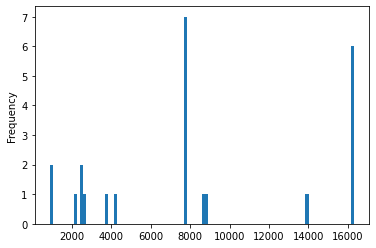

In [227]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cities = list(df['City'].unique())
# scaler.fit_transform(test_data)
# test_data
# for city in cities:
test_data = df[(  #(df['City'] == 'London') & 
                (df['Rating'] >= 1) & 
                (df['Rating'] < 2) & 
                (df['Price Range'] == 1))] 
# pd.DataFrame(scaler.fit(pd.DataFrame(test_data)), columns=['City'])
# scaler.fit_transform(test_data)
test_data
test_data['Ranking'].plot(kind = 'hist', bins=100)


# def scaleColumns(df, cols_to_scale):
#     for col in cols_to_scale:
#         df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(dfTest[col])),columns=[col])
#     return df

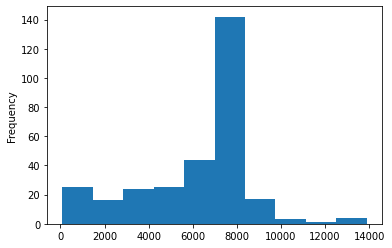

In [167]:
test_data['Ranking'].plot(kind = 'hist')

In [7]:
def last_reviews(review):
    result = '01/01/1990'
    if review != '[[], []]':
        review_date = review[3:-3].split("], [")
        if len(review_date)>1:
            result = review_date[1][1:].split("\', \'")[0]
    return result

def prev_reviews(review):
    result = '01/01/1950'
    if review != '[[], []]':
        review_date = review[3:-3].split("], [")
        if len(review_date)>1:
            tmp = review_date[1][1:].split("\', \'")
            if len(tmp)>1:
                result = tmp[1]
    return result

In [8]:
# df['LastDate'] = df['Reviews'].apply(last_reviews)
# df['PrevDate'] = df['Reviews'].apply(prev_reviews)

df['LastDate'] = pd.to_datetime(df['Reviews'].apply(last_reviews), format='%m/%d/%Y', errors='ignore')
df['PrevDate'] = pd.to_datetime(df['Reviews'].apply(prev_reviews), format='%m/%d/%Y', errors='ignore')
# df['deltaDate'] = df['LastDate'] - df['PrevDate']
# df['deltaDate'] = df['deltaDate'].dt.days.abs()
# df[((df['deltaDate'] >= 200) & (df['Number of Reviews'] <= 5) )][['LastDate', 'PrevDate', 'deltaDate']]
# test = df[(df['LastDate'] == 0)][['Ranking', 'Reviews', 'Number of Reviews', 'LastDate', 'Rating']]
# test['Rating'].plot()
# df.head()
# df[(df['LastDate'] > '01/01/2000')]['LastDate'].min()
df['LastReviewDays'] = datetime.datetime.now() - df['LastDate']
df['PrevReviewDays'] = df['LastDate'] - df['PrevDate']
df['LastReviewDays'] = df['LastReviewDays'].dt.days.abs()
df['PrevReviewDays'] = df['PrevReviewDays'].dt.days.abs()
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,empty_price,count_cuisine_style,norm_ranking_city,counts_id,LastDate,PrevDate,LastReviewDays,PrevReviewDays
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,3,0.398126,3,2017-12-31,2017-11-20,1016,41
1,id_1535,Stockholm,NaN,1537.0,4.0,2,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,1,1,0.623630,10,2017-07-06,2016-06-19,1194,382
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,7,0.021407,8,2018-01-08,2018-01-06,1008,2
3,id_3456,Berlin,NaN,3458.0,5.0,2,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,1,1,0.542543,4,1990-01-01,1950-01-01,11242,14610
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0,3,0.223913,14,2017-11-18,2017-02-19,1059,272


In [9]:
# Добавляем dummy
df['Cuisine Style'] = df['Cuisine Style'].fillna("['Other']")
df['Cuisine Style'] = df['Cuisine Style'].apply(lambda x: x if type(x) is list else x[2:-2].split("\', \'"))
all_cuisines = [item for sublist in df['Cuisine Style'].to_list() for item in sublist]
style_cuisines = collections.Counter()
for x in all_cuisines:
    style_cuisines[x] += 1

# style_cuisines.most_common()
# # len(list(style_cuisines))

cuisines_category = {'Vegan':['Vegetarian Friendly', 'Vegan Options' ],
       'European': ['Norwegian', 'Scottish', 'European', 'Italian', 'French', 'British', 'Central European', 'Portuguese', 'German', 'Spanish', 'Polish', 'Dutch', 'Belgian', 'Irish', 'Swiss', 'Hungarian', 'Swedish', 'Scandinavian', 'Czech', 'Austrian', 'Danish'],
       'Other': ['Other', 'Balti', 'Australian'],
       'Cafe': ['Cafe'], 
       'Bar': ['Bar', 'Pub', 'Wine Bar', 'Diner', 'Brew Pub'],
       'Exlusive': ['Gastropub', 'Kosher', 'Exlusive', 'Grill', 'Gluten Free Options', 'Healthy', 'Steakhouse', 'Barbecue', 'Delicatessen', 'Halal'],
       'Asian': ['Sri Lankan', 'Bangladeshi', 'Taiwanese', 'Minority Chinese', 'Malaysian', 'Singaporean', 'Asian', 'Sushi', 'Japanese', 'Thai', 'Vietnamese', 'Chinese', 'Indian', 'Tibetan', 'Nepali', 'Korean'],
       'Eastern': ['Armenian', 'Ukrainian', 'Eastern', 'Middle Eastern',  'Eastern European', 'Slovenian', 'Russian'],
       'Southwestern': ['Cambodian', 'Persian', 'Mongolian', 'Arabic', 'Israeli', 'Southwestern', 'Turkish', 'Pakistani', 'Moroccan', 'Lebanese', 'African', 'Ethiopian', 'Egyptian'],
       'Latin': ['Jamaican', 'Colombian', 'Cuban', 'Chilean', 'Ecuadorean', 'Brazilian', 'South American', 'Mexican', 'Venezuelan', 'Latin', 'Argentinean', 'Peruvian'], 
       'International': ['International', 'Fusion', 'Soups', 'Contemporary'],
       'Fast Food': ['Fast Food', 'Pizza', 'Street Food'],
       'Seafood': ['Hawaiian', 'Seafood', 'Mediterranean', 'Greek', 'Caribbean', 'Indonesian'],
       'American': ['Central American', 'American']
}
cuisines_category_convert = dict()
for key, values in cuisines_category.items():
    for value in values:
        cuisines_category_convert[value] = key

new_cuisines = dict()
count = 0
for key, value in dict(style_cuisines).items():
    count += 1
    if key in cuisines_category_convert.keys():
        new_cuisines.setdefault(cuisines_category_convert[key], 0)
        new_cuisines[cuisines_category_convert[key]] += value
    else:
        new_cuisines.setdefault(cuisines_category_convert['Other'], 0)
        new_cuisines[cuisines_category_convert['Other']] += value

    
def convert_cuisines(cuisines):
    result = set()
    for cuisine in cuisines:
        if cuisine in cuisines_category_convert.keys():
            result.add(cuisines_category_convert[cuisine])
        else:
            result.add('Other')
    return list(result)

df['Cuisine Style'] = df['Cuisine Style'].apply(convert_cuisines)
df['count_cuisine_group'] = df['Cuisine Style'].apply(len)

new_dummies = pd.get_dummies(df[(df['count_cuisine_group'] >= (1))]['Cuisine Style'].apply(lambda x: x[0]))
for index in range(1,int(df['count_cuisine_group'].max())):
    B = pd.get_dummies(df[(df['count_cuisine_group'] >= (index+1))]['Cuisine Style'].apply(lambda x: x[index]))
    new_dummies = new_dummies.add(B, fill_value=0)

df = pd.concat([df, new_dummies], axis=1)
# pd.get_dummies(pd.Series(df['Cuisine Style'])
# test = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],
#                      'C': [1, 2, 3]})
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,Eastern,European,Exlusive,Fast Food,International,Latin,Other,Seafood,Southwestern,Vegan
0,id_5569,Paris,"[International, European]",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,id_1535,Stockholm,[Other],1537.0,4.0,2,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,id_352,London,"[Vegan, Asian, Exlusive]",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,id_3456,Berlin,[Other],3458.0,5.0,2,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,id_615,Munich,"[Vegan, European]",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [400]:
df pd.concat([df, new_dummies], axis=1)




,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,Cafe,Eastern,European,Exlusive,Fast Food,International,Latin,Other,Seafood,Southwestern
0,id_5569,Paris,"[International, European]",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,id_1535,Stockholm,[Other],1537.0,4.0,2,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,id_352,London,"[Other, Exlusive, Asian]",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,id_3456,Berlin,[Other],3458.0,5.0,2,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,id_615,Munich,"[Other, European]",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"[Other, Exlusive, European]",500.0,4.5,2,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
39996,id_6340,Paris,"[Other, Bar, American, European]",6341.0,3.5,2,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39997,id_1649,Stockholm,[Asian],1652.0,4.5,2,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39998,id_640,Warsaw,"[Other, European, Eastern]",641.0,4.0,2,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [320]:
# City -> dummy
cities_freq = list(df['City'].value_counts())
top_cities_count = int(np.percentile(cities_freq, 90))
all_cities = df['City'].value_counts().index
top_cities = list(all_cities)[:top_cities_count]
top_cities

['London',
 'Paris',
 'Madrid',
 'Barcelona',
 'Berlin',
 'Milan',
 'Rome',
 'Prague',
 'Lisbon',
 'Vienna',
 'Amsterdam',
 'Brussels',
 'Hamburg',
 'Munich',
 'Lyon',
 'Stockholm',
 'Budapest',
 'Warsaw',
 'Dublin',
 'Copenhagen',
 'Athens',
 'Edinburgh',
 'Zurich',
 'Oporto',
 'Geneva',
 'Krakow',
 'Oslo',
 'Helsinki',
 'Bratislava',
 'Luxembourg',
 'Ljubljana']

In [307]:
test

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [25]:
# df.info()
X = df.drop(['Restaurant_id', 
             'City', 
             'Cuisine Style', 
             'Ranking', 
             'Reviews', 
             'LastDate', 
             'URL_TA', 
             'ID_TA', 
             'PrevDate',
             'count_cuisine_group'], axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rating               40000 non-null  float64
 1   Price Range          40000 non-null  int64  
 2   Number of Reviews    37457 non-null  float64
 3   empty_price          40000 non-null  int64  
 4   count_cuisine_style  40000 non-null  int64  
 5   norm_ranking_city    40000 non-null  float64
 6   counts_id            40000 non-null  int64  
 7   LastReviewDays       40000 non-null  int64  
 8   PrevReviewDays       40000 non-null  int64  
 9   American             40000 non-null  float64
 10  Asian                40000 non-null  float64
 11  Bar                  40000 non-null  float64
 12  Cafe                 40000 non-null  float64
 13  Eastern              40000 non-null  float64
 14  European             40000 non-null  float64
 15  Exlusive             40000 non-null 

In [26]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
# X = df.drop(['Restaurant_id', 'Rating'], axis = 1)
# df_cleared = df[((df['deltaDate'] < 200) & (df['Number of Reviews'] >= 2))][['Number of Reviews', 'Rating', 'Price Range', 'deltaDate']].dropna()
# df_cleared = df[(df['PrevReviewDays'] <= 2000)].dropna()
X = X.dropna()
display(X.info())
display(X.head())
# X = df_cleared[['Number of Reviews', 'Price Range', 'deltaDate']]
# X = df_cleared
y = X['Rating']
X = X.drop(['Rating'], axis = 1)
X.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37457 entries, 0 to 39999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rating               37457 non-null  float64
 1   Price Range          37457 non-null  int64  
 2   Number of Reviews    37457 non-null  float64
 3   empty_price          37457 non-null  int64  
 4   count_cuisine_style  37457 non-null  int64  
 5   norm_ranking_city    37457 non-null  float64
 6   counts_id            37457 non-null  int64  
 7   LastReviewDays       37457 non-null  int64  
 8   PrevReviewDays       37457 non-null  int64  
 9   American             37457 non-null  float64
 10  Asian                37457 non-null  float64
 11  Bar                  37457 non-null  float64
 12  Cafe                 37457 non-null  float64
 13  Eastern              37457 non-null  float64
 14  European             37457 non-null  float64
 15  Exlusive             37457 non-null 

None

,Rating,Price Range,Number of Reviews,empty_price,count_cuisine_style,norm_ranking_city,counts_id,LastReviewDays,PrevReviewDays,American,...,Eastern,European,Exlusive,Fast Food,International,Latin,Other,Seafood,Southwestern,Vegan
0,3.5,2,194.0,0,3,0.398126,3,1016,41,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,4.0,2,10.0,1,1,0.623630,10,1194,382,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4.5,3,688.0,0,7,0.021407,8,1008,2,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5.0,2,3.0,1,1,0.542543,4,11242,14610,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4.0,2,84.0,0,3,0.223913,14,1059,272,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,Price Range,Number of Reviews,empty_price,count_cuisine_style,norm_ranking_city,counts_id,LastReviewDays,PrevReviewDays,American,Asian,...,Eastern,European,Exlusive,Fast Food,International,Latin,Other,Seafood,Southwestern,Vegan
0,2,194.0,0,3,0.398126,3,1016,41,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,10.0,1,1,0.623630,10,1194,382,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,688.0,0,7,0.021407,8,1008,2,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2,3.0,1,1,0.542543,4,11242,14610,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2,84.0,0,3,0.223913,14,1059,272,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [27]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [22]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [28]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)
# y_pred = round(y_pred * 2)/2
# y_pred

In [29]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.25559743726641754
